<a href="https://colab.research.google.com/github/khoaphamj1505/CS114.L11.KHCL/blob/master/sarcasm%20detection/Coparation_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT THƯ VIỆN

In [ ]:
import pandas as pd
import time

from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay, classification_report

## UPLOAD VÀ ĐỌC DATA

In [ ]:
# Load và đọc dữ liệu từ files
df1 = pd.read_json("https://raw.githubusercontent.com/khoaphamj1505/CS114.L11.KHCL/master/sarcasm%20detection/Sarcasm_Headlines_Dataset.json", lines=True)
df1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
# Load và đọc dữ liệu từ files 
df2 = pd.read_json("https://raw.githubusercontent.com/khoaphamj1505/CS114.L11.KHCL/master/sarcasm%20detection/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...



## CHIA DATA

In [ ]:
# Phân chia trường dữ liệu ngẫu nhiên 
X1_train, X1_test, Y1_train, Y1_test=train_test_split(df1['headline'], df1['is_sarcastic'], random_state=100) 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(df2['headline'], df2['is_sarcastic'], random_state=100)

In [ ]:
# Nối 2 files dữ liệu gồm các trường sau khi đã phân chia
X_train=pd.concat([X1_train, X2_train], ignore_index=True)
X_test=pd.concat([X1_test,X2_test], ignore_index=True)
Y_train=pd.concat([Y1_train,Y2_train], ignore_index=True)
Y_test=pd.concat([Y1_test, Y2_test], ignore_index=True)

## LỌC VÀ CHUẨN HÓA DỮ LIỆU

In [ ]:
# Dùng hàm Tf-idf để chuẩn hóa dữ liệu chữ tiếng Anh sang vector với tối đa 3000 features, viết thường, lọc các stop_word và tính xác suất xuất hiện 3 từ sau 1 từ
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1,3))
X_train=vectorizer.fit_transform(X_train) # Fit dữ liệu dữ liệu train cho hàm 
X_test=vectorizer.transform(X_test) # Chuẩn hóa dữ liệu test về ma trận

## TRAINING VÀ ĐÁNH GIÁ MODEL

## Naive Bayes

### Multinomial Naive Bayes

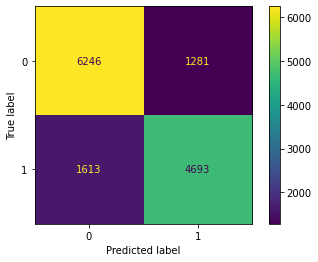

In [ ]:
t0=time.clock()  # Gọi hàm thời gian hiện tại
MNB = MultinomialNB().fit(X_train.toarray(), Y_train) # Gọi model, fit dữ liệu cho model và chuyển đổi dữ liệu train về kiểu numpy
Y_pred=MNB.predict(X_test.toarray()) # Gọi hàm predict cho model với dữ liệu test thuộc kiểu numpy
t1=time.clock()  # Gọi hàm thời gian hiện tại
cm=confusion_matrix(Y_test, Y_pred) # Gọi hàm tính Confusion Matrix
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d") # Gọi hàm vẽ hình Confusion Matrix với các labels tương ứng và đặt chuẩn hiển thị số cho Confusion Matrix

In [ ]:
print(classification_report(Y_test, Y_pred, labels=[0, 1])) # Xuất ra bảng tính toán các giá trị liên quan đến độ chính xác của model

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7527
           1       0.79      0.74      0.76      6306

    accuracy                           0.79     13833
   macro avg       0.79      0.79      0.79     13833
weighted avg       0.79      0.79      0.79     13833



In [ ]:
print(t1-t0) # Xuất ra khoảng thời gian để train và predict của model

0.7539730000000002


### Complement Naive Bayes

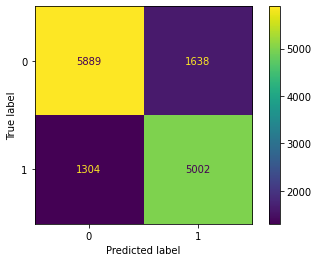

In [ ]:
t0=time.clock()  # Gọi hàm thời gian hiện tại
CoNB = ComplementNB().fit(X_train, Y_train) # Gọi model và fit dữ liệu cho model
Y_pred=CoNB.predict(X_test) # Gọi hàm predict cho model
t1=time.clock()  # Gọi hàm thời gian hiện tại
cm=confusion_matrix(Y_test, Y_pred) # Gọi hàm tính Confusion Matrix
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d") # Gọi hàm vẽ hình Confusion Matrix với các labels tương ứng và đặt chuẩn hiển thị số cho Confusion Matrix

In [ ]:
print(classification_report(Y_test, Y_pred, labels=[0, 1])) # Xuất ra bảng tính toán các giá trị liên quan đến độ chính xác của model

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      7527
           1       0.75      0.79      0.77      6306

    accuracy                           0.79     13833
   macro avg       0.79      0.79      0.79     13833
weighted avg       0.79      0.79      0.79     13833



In [ ]:
print(t1-t0) # Xuất ra khoảng thời gian để train và predict của model

0.013643000000000072


##  Decision Tree Classifier

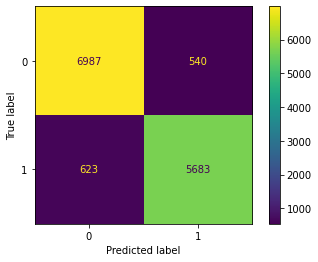

In [ ]:
t0=time.clock()  # Gọi hàm thời gian hiện tại
DTC = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
Y_pred=DTC.predict(X_test) # Gọi hàm predict cho model
t1=time.clock()  # Gọi hàm thời gian hiện tại
cm=confusion_matrix(Y_test, Y_pred) # Gọi hàm tính Confusion Matrix
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d") # Gọi hàm vẽ hình Confusion Matrix với các labels tương ứng và đặt chuẩn hiển thị số cho Confusion Matrix

In [ ]:
print(classification_report(Y_test, Y_pred, labels=[0, 1])) # Xuất ra bảng tính toán các giá trị liên quan đến độ chính xác của model

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      7527
           1       0.91      0.90      0.91      6306

    accuracy                           0.92     13833
   macro avg       0.92      0.91      0.92     13833
weighted avg       0.92      0.92      0.92     13833



In [ ]:
print(t1-t0) # Xuất ra khoảng thời gian để train và predict của model

16.147607


##linear SVM Classification

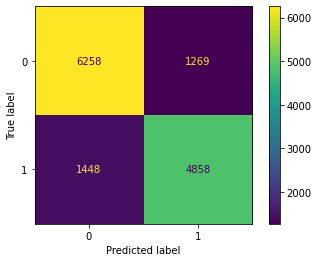

In [ ]:
t0=time.clock()  # Gọi hàm thời gian hiện tại
L_SVC = LinearSVC().fit(X_train, Y_train) # Gọi model và fit dữ liệu cho model
Y_pred=L_SVC.predict(X_test) # Gọi hàm predict cho model
t1=time.clock()  # Gọi hàm thời gian hiện tại
cm=confusion_matrix(Y_test, Y_pred) # Gọi hàm tính Confusion Matrix
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d") # Gọi hàm vẽ hình Confusion Matrix với các labels tương ứng và đặt chuẩn hiển thị số cho Confusion Matrix

In [ ]:
print(classification_report(Y_test, Y_pred, labels=[0, 1])) # Xuất ra bảng tính toán các giá trị liên quan đến độ chính xác của model

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      7527
           1       0.79      0.77      0.78      6306

    accuracy                           0.80     13833
   macro avg       0.80      0.80      0.80     13833
weighted avg       0.80      0.80      0.80     13833



In [ ]:
print(t1-t0) # Xuất ra khoảng thời gian để train và predict của model

0.21939499999999867


## Nonlinear SVM Classification

### SVM classifiers using a polynomial kernel

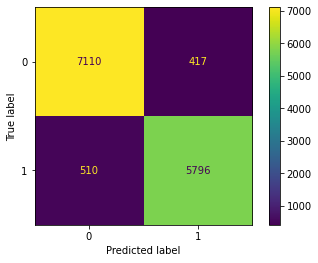

In [ ]:
t0=time.clock()  # Gọi hàm thời gian hiện tại
Poly_SVC = SVC(kernel="poly", degree=2, coef0=1, C=1000).fit(X_train, Y_train)
Y_pred=Poly_SVC.predict(X_test) # Gọi hàm predict cho model
t1=time.clock()  # Gọi hàm thời gian hiện tại
cm=confusion_matrix(Y_test, Y_pred) # Gọi hàm tính Confusion Matrix
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d") # Gọi hàm vẽ hình Confusion Matrix với các labels tương ứng và đặt chuẩn hiển thị số cho Confusion Matrix

In [ ]:
print(classification_report(Y_test, Y_pred, labels=[0, 1])) # Xuất ra bảng tính toán các giá trị liên quan đến độ chính xác của model

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7527
           1       0.93      0.92      0.93      6306

    accuracy                           0.93     13833
   macro avg       0.93      0.93      0.93     13833
weighted avg       0.93      0.93      0.93     13833



In [ ]:
print(t1-t0) # Xuất ra khoảng thời gian để train và predict của model

500.406726


### SVM classifiers using an RBF kernel

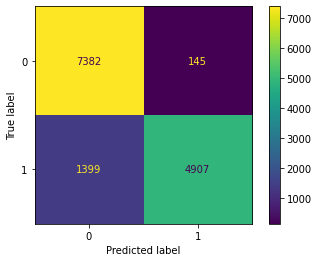

In [ ]:
t0=time.clock()  # Gọi hàm thời gian hiện tại
Rbf_SVC = SVC(kernel="rbf", gamma=5, C=1000).fit(X_train, Y_train)
Y_pred=Rbf_SVC.predict(X_test) # Gọi hàm predict cho model
t1=time.clock()  # Gọi hàm thời gian hiện tại
cm=confusion_matrix(Y_test, Y_pred) # Gọi hàm tính Confusion Matrix
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d") # Gọi hàm vẽ hình Confusion Matrix với các labels tương ứng và đặt chuẩn hiển thị số cho Confusion Matrix

In [ ]:
print(classification_report(Y_test, Y_pred, labels=[0, 1])) # Xuất ra bảng tính toán các giá trị liên quan đến độ chính xác của model

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      7527
           1       0.97      0.78      0.86      6306

    accuracy                           0.89     13833
   macro avg       0.91      0.88      0.88     13833
weighted avg       0.90      0.89      0.89     13833



In [ ]:
print(t1-t0) # Xuất ra khoảng thời gian để train và predict của model

337.133196
